# Eksperiment 2

Na osnovu procesa opisanog merenjima sa senzora A predvideti ponašanje


In [57]:
import numpy as np
import random

x = np.arange(1, 5, 0.1)
E = np.zeros((len(x), 3), dtype='float32')
err = 0.2
y = np.sin(x)+2*err*np.random.rand(len(x))-err
yt = np.sin(x)

E[:,0] = x
E[:,1] = y
E[:,2] = yt

Obucavajuci skup
- ulaz: interval 1,5 korak::0.1
- izlaz: zasumljeni sin

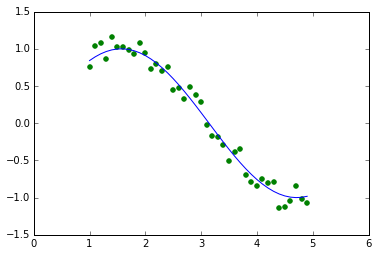

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots()
rects1 = ax.scatter(E[:, 0], E[:, 1], color='g')
rects2 = ax.plot(E[:, 0], yt, color='b')
plt.show()

In [101]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('tanh'))

In [102]:
sgd = SGD(lr=0.01, decay=0.0000001, momentum=0.7)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [103]:
training = model.fit(E[:,0:1], E[:,1], nb_epoch=5000, 
                    batch_size=40, verbose=0)
print training.history['loss'][-1]

0.0140063585714


In [104]:
t = model.predict(E[:,0:1], verbose=0)

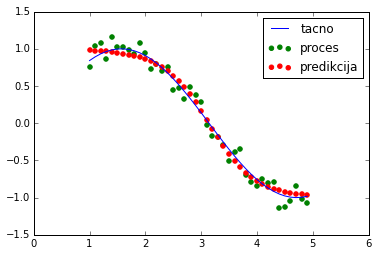

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots()
rects1 = ax.scatter(E[:, 0], E[:, 1], color='g', label='proces')
rects2 = ax.plot(E[:, 0], E[:, 2], color='b', label='tacno')
rects3 = ax.scatter(E[:, 0], t, color='r', label='predikcija')
plt.legend(loc='upper right')
plt.show()
